# Performance Metrics of trained machine learning models namely Decision Tree, Random Forest and XGBoost

# Note- We have extracted the predicted output and probability predictions of the above shown machine learning models from the S3 buckets.

In [29]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn import metrics

In [16]:
# Open the pickle file  for reading

#replace the filename below to your pickle file name; pickle files names should be in the same location, otherwise specify path 

with open('y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)

# access loaded data 
y_test

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

In [18]:
type(y_test)

pandas.core.series.Series

In [20]:
y_test = np.array(y_test)
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
print(type(y_test))
print("\n")
print(len(y_test))   

<class 'numpy.ndarray'>


555719


In [17]:
# Open the pickle file  for reading

#replace the filename below to your pickle file name; pickle files names should be in the same location, otherwise specify path 

with open('y_pred_dt.pkl', 'rb') as file:
    y_pred_dt = pickle.load(file)

# Predicted values of decision tree model on Test data
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
print(type(y_pred_dt))
print("\n")
print(len(y_pred_dt))     

<class 'numpy.ndarray'>


555719


In [22]:
# Open the pickle file  for reading

#replace the filename below to your pickle file name; pickle files names should be in the same location, otherwise specify path 

with open('y_score_dt.pkl', 'rb') as file:
    y_score_dt = pickle.load(file)

# Probability estimates of Trained decision tree model on test data.
y_score_dt

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
# Open the pickle file  for reading

#replace the filename below to your pickle file name; pickle files names should be in the same location, otherwise specify path 

with open('y_pred_rf.pkl', 'rb') as file:
    y_pred_rf = pickle.load(file)

# Predicted values of Random forest model on Test data
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
# Open the pickle file  for reading

#replace the filename below to your pickle file name; pickle files names should be in the same location, otherwise specify path 

with open('y_score_rf.pkl', 'rb') as file:
    y_score_rf = pickle.load(file)

# Probability estimates of Random forest model on test data.
y_score_rf

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
# Open the pickle file  for reading

#replace the filename below to your pickle file name; pickle files names should be in the same location, otherwise specify path 

with open('y_pred_xgboost.pkl', 'rb') as file:
    y_pred_xgboost = pickle.load(file)

# Predicted values of XGBoost model on Test data
y_pred_xgboost

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
# Open the pickle file  for reading

#replace the filename below to your pickle file name; pickle files names should be in the same location, otherwise specify path 

with open('y_score_xgboost.pkl', 'rb') as file:
    y_score_xgboost = pickle.load(file)

# Probability estimates of XGBoost model on test data.
y_score_xgboost

array([0.01380861, 0.14648443, 0.06030422, ..., 0.05533106, 0.05092629,
       0.0103499 ], dtype=float32)

In [42]:
def model_metrics(target, predicted, y_score, model, normalize_matrix= None):
    accuracy = metrics.accuracy_score(target, predicted)
    precision = metrics.precision_score(target, predicted)
    recall = metrics.recall_score(target, predicted)
    f1 = f1_score(target, predicted)
    auc = metrics.roc_auc_score(target, y_score)

    confusion_matrix = metrics.confusion_matrix(
        target, predicted, normalize=normalize_matrix)
    cm_display = metrics.ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix, display_labels=[False, True])
    cm_display.plot()
    plt.grid(False)
    plt.show()

    fpr, tpr, threshold = roc_curve(target, y_score)
    plt.plot(fpr, tpr, label=model, c="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", c="yellow")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

    print("Accuracy", accuracy.round(2))
    print("Precision:", precision.round(2))
    print("Recall:", recall.round(2))
    print("F1 Score", f1.round(2))
    print("AUC:", auc)
    return None

# 1- Performance metrics of Decision Tree classifier for Credit Card Fraud detection.

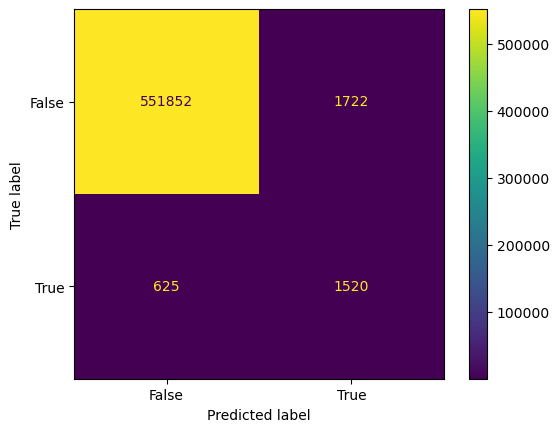

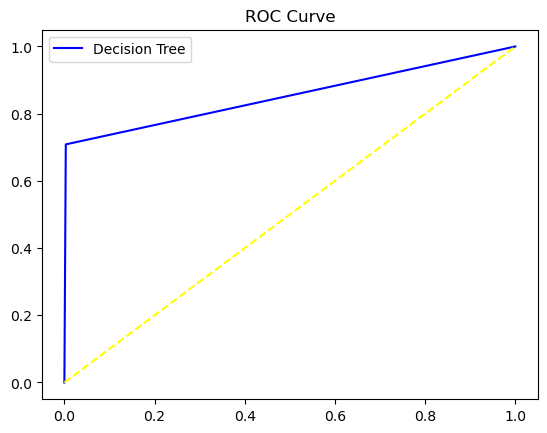

Accuracy 1.0
Precision: 0.47
Recall: 0.71
F1 Score 0.56
AUC: 0.8527570066984851


In [43]:
#Model metrics on Test data for Decision Tree classifier
model = 'Decision Tree'
model_metrics(y_test,  y_pred_dt, y_score_dt, model)

# 2- Performance metrics of Random Forest classifier for Credit Card Fraud detection.

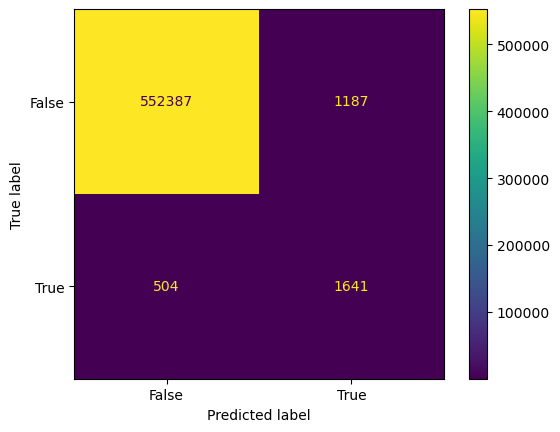

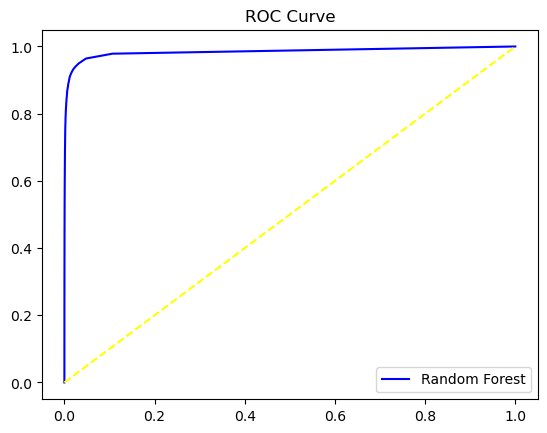

Accuracy 1.0
Precision: 0.58
Recall: 0.77
F1 Score 0.66
AUC: 0.9845441947513215


In [44]:
#Model metrics on Test data for Random Forest classifier
model = 'Random Forest'
model_metrics(y_test,  y_pred_rf, y_score_rf, model)

# 3- Performance metrics of XGBoost for Credit Card Fraud detection.

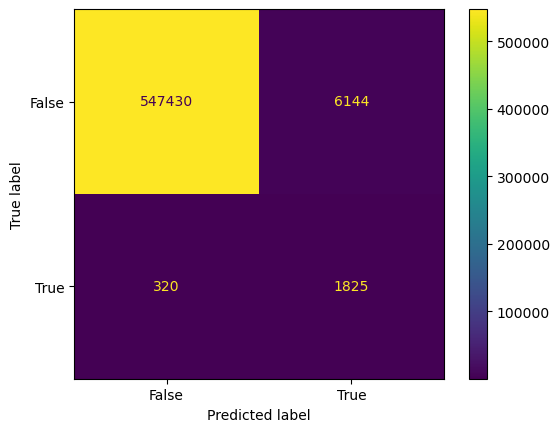

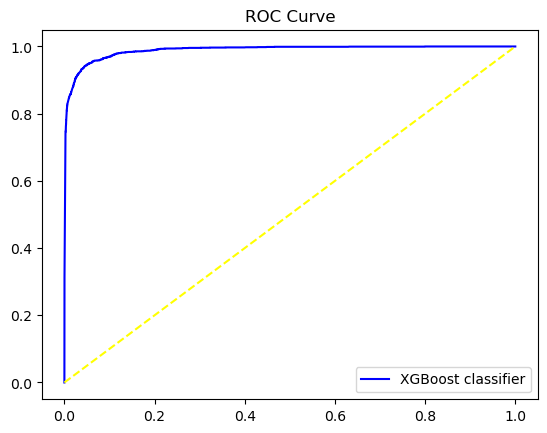

Accuracy 0.99
Precision: 0.23
Recall: 0.85
F1 Score 0.36
AUC: 0.9887370526340203


In [45]:
#Model metrics on Test data for XGBoost classifier
model = 'XGBoost classifier'
model_metrics(y_test,  y_pred_xgboost, y_score_xgboost, model)